The goal of this project is to get some hands on experience with Python, specifically Jupyter notebooks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
import matplotlib.patheffects as pe

In [3]:
nvda = yf.Ticker('nvda')
nvda

yfinance.Ticker object <NVDA>

### Exploratory Data Analysis and Visualization

In [4]:
data = nvda.history(period = '2y', interval='1d')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-12 00:00:00-04:00,198.400826,199.988428,195.904590,198.750305,15165200,0.0,0.0
2021-08-13 00:00:00-04:00,198.750324,201.835668,198.211128,201.576065,18306300,0.0,0.0
2021-08-16 00:00:00-04:00,201.046851,202.564552,194.237112,199.199631,21087600,0.0,0.0
2021-08-17 00:00:00-04:00,196.553650,197.402362,192.379935,194.287064,20458500,0.0,0.0
2021-08-18 00:00:00-04:00,194.706392,196.044370,189.713920,190.113312,28591300,0.0,0.0


In [5]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
data.shape

(503, 7)

Text(0.5, 1.0, '$NVDA 2 Year Historical Chart')

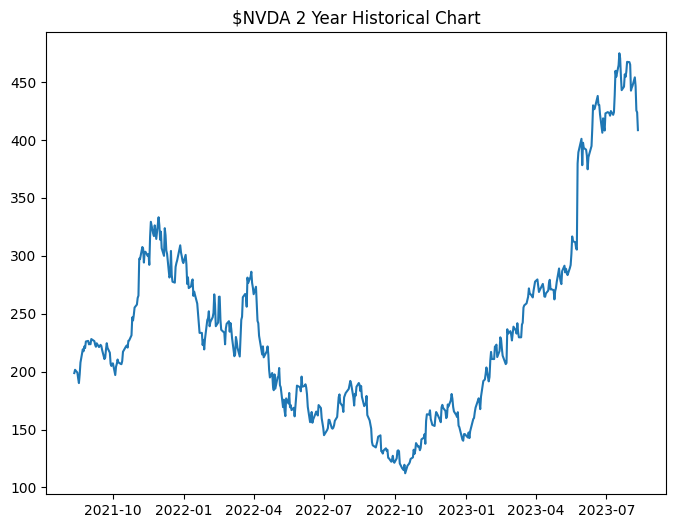

In [7]:
plt.figure(figsize=(8,6))
plt.plot(data['Close'])
plt.title('$NVDA 2 Year Historical Chart')

This plot would have much greater function in Plotly

In [8]:
fig = px.line(data['Close'])
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    yaxis_title= "Closing Price",
    title= "2-year Nvidia Stock Price", 
    )
fig.show()

#### Plotting distribution of daily returns

In [9]:
data['Daily Returns'] = data['Close'].pct_change()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns
Date,,,,,,,,
2021-08-12 00:00:00-04:00,198.400826,199.988428,195.904590,198.750305,15165200,0.0,0.0,NaN
2021-08-13 00:00:00-04:00,198.750324,201.835668,198.211128,201.576065,18306300,0.0,0.0,0.014218
2021-08-16 00:00:00-04:00,201.046851,202.564552,194.237112,199.199631,21087600,0.0,0.0,-0.011789
2021-08-17 00:00:00-04:00,196.553650,197.402362,192.379935,194.287064,20458500,0.0,0.0,-0.024662
2021-08-18 00:00:00-04:00,194.706392,196.044370,189.713920,190.113312,28591300,0.0,0.0,-0.021482


In [10]:
daily_returns = data['Daily Returns'].dropna()

Text(0.5, 0, 'Daily Returns')

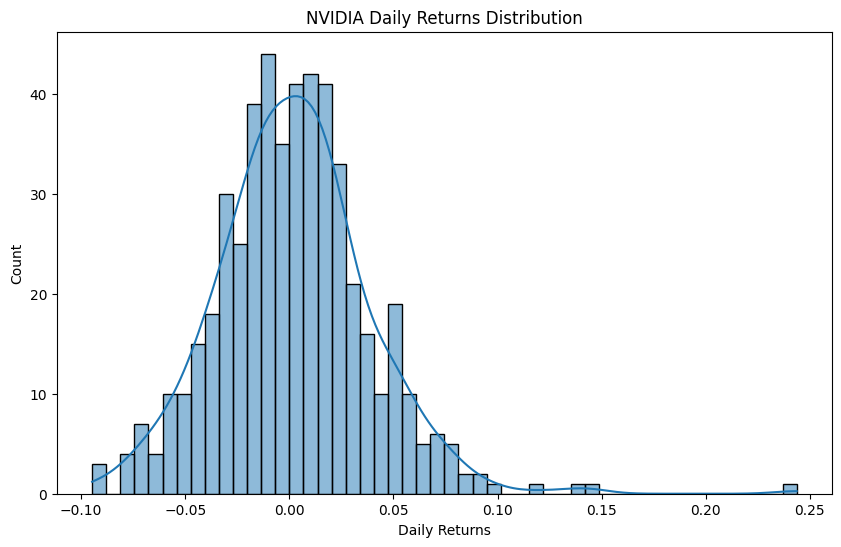

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(daily_returns, bins =50, kde=True)
plt.title('NVIDIA Daily Returns Distribution')
plt.xlabel('Daily Returns')

Lets analyze this chart further with some basic statistics

In [12]:
daily_returns.describe()

count    502.000000
mean       0.002104
std        0.036914
min       -0.094726
25%       -0.020378
50%        0.001471
75%        0.021941
max        0.243696
Name: Daily Returns, dtype: float64

In [13]:
from scipy.stats import skew, kurtosis

In [14]:
skewness = skew(daily_returns)
print(f"Skewness = {skewness}")

k = kurtosis(daily_returns)
print(f'Kurtosis = {k}')

Skewness = 0.7847764615089518
Kurtosis = 3.8542285089748276


Kurtosis and Skewness of Nvidia's returns tell us that the stock has above average returns 
due to the positive skewness, and a Kurtosis of 3.9 indicates high probability of extreme
retuns (either positive or negative).

Speaking of volatily can I calculate NVIDIAS beta based on the SP500

In [15]:
stock_info = nvda.info
stock_info['beta']

1.753377

In [16]:
#that was easy but lets do it by hand, and look at the stocks beta over a 2 year period instead of 5. (post-covid)
sp500 = yf.Ticker("^GSPC")
index_data = sp500.history(period = '2y', interval='1d')
index_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-12 00:00:00-04:00,4446.080078,4461.770020,4435.959961,4460.830078,3375310000,0.0,0.0
2021-08-13 00:00:00-04:00,4464.839844,4468.370117,4460.819824,4468.000000,3016470000,0.0,0.0
2021-08-16 00:00:00-04:00,4461.649902,4480.259766,4437.660156,4479.709961,3370640000,0.0,0.0
2021-08-17 00:00:00-04:00,4462.120117,4462.120117,4417.830078,4448.080078,3836960000,0.0,0.0
2021-08-18 00:00:00-04:00,4440.939941,4454.319824,4397.589844,4400.270020,3755590000,0.0,0.0


In [17]:
index_data['Percent Change'] = index_data['Close'].pct_change()
index_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Percent Change
Date,,,,,,,,
2021-08-12 00:00:00-04:00,4446.080078,4461.770020,4435.959961,4460.830078,3375310000,0.0,0.0,NaN
2021-08-13 00:00:00-04:00,4464.839844,4468.370117,4460.819824,4468.000000,3016470000,0.0,0.0,0.001607
2021-08-16 00:00:00-04:00,4461.649902,4480.259766,4437.660156,4479.709961,3370640000,0.0,0.0,0.002621
2021-08-17 00:00:00-04:00,4462.120117,4462.120117,4417.830078,4448.080078,3836960000,0.0,0.0,-0.007061
2021-08-18 00:00:00-04:00,4440.939941,4454.319824,4397.589844,4400.270020,3755590000,0.0,0.0,-0.010748


Text(0.5, 0, 'Daily Returns')

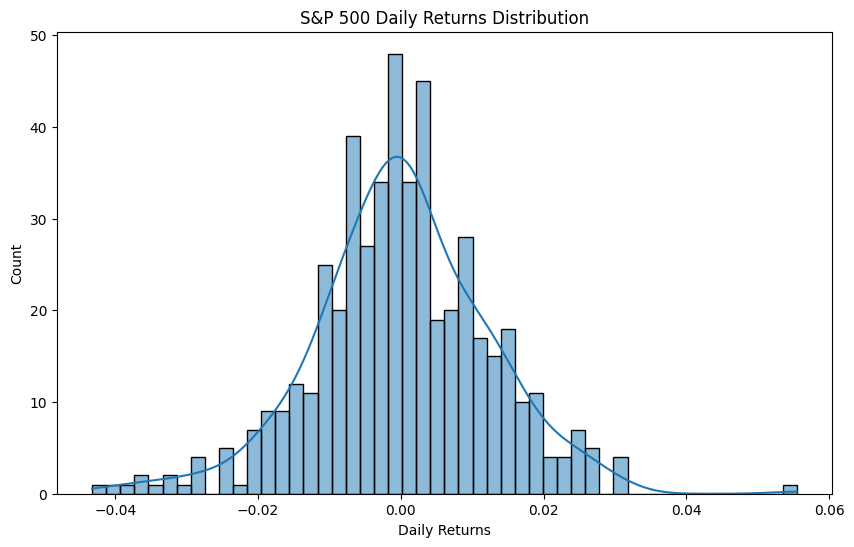

In [18]:
#Let's explore the histogram here
index_returns = index_data['Percent Change'].dropna()
plt.figure(figsize=(10,6))
sns.histplot(index_returns, bins =50, kde=True)
plt.title('S&P 500 Daily Returns Distribution')
plt.xlabel('Daily Returns')

In [19]:
#Checking out the skewness and Kurtosis
s = skew(index_returns)
print(f"Skewness = {s}")

k2 = kurtosis(index_returns)
print(f'Kurtosis = {k2}')

Skewness = -0.07324139001903597
Kurtosis = 1.2129758372709327


Here we can see the S&P 500 over the last two years has a slight bias towards negative returns as by the -.079 skewness but they have much lower volatility, as expected, then NVDA with a Kurtosis of 1.122

In [20]:
#Let's manually test for beta, start by combining the return columns
merged_data = pd.merge(daily_returns, index_returns, left_index=True, right_index=True, how = 'inner')
merged_data


,Daily Returns,Percent Change
Date,,
2021-08-13 00:00:00-04:00,0.014218,0.001607
2021-08-16 00:00:00-04:00,-0.011789,0.002621
2021-08-17 00:00:00-04:00,-0.024662,-0.007061
2021-08-18 00:00:00-04:00,-0.021482,-0.010748
2021-08-19 00:00:00-04:00,0.039811,0.001257
...,...,...
2023-08-07 00:00:00-04:00,0.016495,0.009024
2023-08-08 00:00:00-04:00,-0.016580,-0.004218
2023-08-09 00:00:00-04:00,-0.047242,-0.007039


In [21]:
#The 'Daily Returns' column represents the Stock Returns and the 'Percent Change' column represents the Index returns, but lets make that more clear
merged_data.columns = ['Nvidia Returns', 'S&P 500 Returns']
merged_data

,Nvidia Returns,S&P 500 Returns
Date,,
2021-08-13 00:00:00-04:00,0.014218,0.001607
2021-08-16 00:00:00-04:00,-0.011789,0.002621
2021-08-17 00:00:00-04:00,-0.024662,-0.007061
2021-08-18 00:00:00-04:00,-0.021482,-0.010748
2021-08-19 00:00:00-04:00,0.039811,0.001257
...,...,...
2023-08-07 00:00:00-04:00,0.016495,0.009024
2023-08-08 00:00:00-04:00,-0.016580,-0.004218
2023-08-09 00:00:00-04:00,-0.047242,-0.007039


In [22]:
#Finally let's calculate Beta
#Reminder: b = (cov(r(i), r(m))) / var(rm)

cov = merged_data.cov()
cov

,Nvidia Returns,S&P 500 Returns
Nvidia Returns,0.001363,0.000341
S&P 500 Returns,0.000341,0.000152


In [23]:
beta = cov.iloc[0,1] / cov.iloc[1,1]
print(f"Nvidia's beta over the last two years is {beta.round(2)}")

Nvidia's beta over the last two years is 2.24


In [24]:
#Remembering the 5-year Beta for NVDA
stock_info = nvda.info
nvda_beta = stock_info['beta']
rounded_nvda_beta = round(nvda_beta, 2)

print(f"Nvidia's beta over the last five years is {(rounded_nvda_beta)}")

Nvidia's beta over the last five years is 1.75


Typically Beta is calculated over 5 years on a monthly basis, therefore we have calculated a different answer then the yfinance outputted beta, but it is good to know that Nvidia's beta is very high currently, relative to its 5y average. Therefore, when making predictions it may be better to use a shorter time frame to reflect to post covid-19 era of stocks which have been more volatile.

## Stock Predictions using LSTM Time Series Analysis

I am interested in testing a deep learning LSTM Model from Chapter 10.5.2 of Intro to Statistical Learning For Python

In [25]:
#Reference the NVDA data set again
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns
Date,,,,,,,,
2021-08-12 00:00:00-04:00,198.400826,199.988428,195.904590,198.750305,15165200,0.0,0.0,NaN
2021-08-13 00:00:00-04:00,198.750324,201.835668,198.211128,201.576065,18306300,0.0,0.0,0.014218
2021-08-16 00:00:00-04:00,201.046851,202.564552,194.237112,199.199631,21087600,0.0,0.0,-0.011789
2021-08-17 00:00:00-04:00,196.553650,197.402362,192.379935,194.287064,20458500,0.0,0.0,-0.024662
2021-08-18 00:00:00-04:00,194.706392,196.044370,189.713920,190.113312,28591300,0.0,0.0,-0.021482


Preparing data for analysis by normalizing, creating training and testing splits, and adding lag features

In [26]:
#Normalizing the Data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(data['Close'].values.reshape(-1,1))
#training_set_scaled

In [27]:
# Train, test, split

train_size = int(len(training_set_scaled) *.8)
train_data = training_set_scaled[:train_size]
test_data = training_set_scaled[train_size:]

### Creating a function to lag the data for time series analysis
It is important for me to create this as a function so I can go back later and easily test different lag periods.

The 'predictor' variable represents the Y value, and the 'sequences' variable represents the 5 days of stock data leading up to that day.

In [28]:
def lag_data(data, lag_time):
    sequences = []
    predictor = []
    for i in range(len(data) - lag_time):
        seq = data[i: i + lag_time]
        label = data[i + lag_time]
        sequences.append(seq)
        predictor.append(label)

    return np.array(sequences), np.array(predictor)

In [29]:
lag_time = 5
X_train, y_train = lag_data(train_data, lag_time)
X_test, y_test = lag_data(test_data, lag_time)
#X_train.shape
#X_test.shape

### Time to train the LSTM model

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 6ms/step - loss: 0.0375
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 13/100
13/13 [=================

#### Making prediction on our never seen test data

In [33]:
predictions = model.predict(X_test)
predictions = sc.inverse_transform(predictions)
predictions.shape

3/3 [==============================] - 1s 2ms/step


(96, 1)

#### Inversing our scaling of the data from before

In [34]:
y_test_inversed = sc.inverse_transform(y_test)

#### Creating a dates variable for our chart, instead of having a list from 0 on the X axis

In [35]:
data_indexed = data.reset_index()
data_indexed.head()
data_index = data_indexed['Date']
dates = data_index[train_size+lag_time:]
dates

407   2023-03-27 00:00:00-04:00
408   2023-03-28 00:00:00-04:00
409   2023-03-29 00:00:00-04:00
410   2023-03-30 00:00:00-04:00
411   2023-03-31 00:00:00-04:00
                 ...           
498   2023-08-07 00:00:00-04:00
499   2023-08-08 00:00:00-04:00
500   2023-08-09 00:00:00-04:00
501   2023-08-10 00:00:00-04:00
502   2023-08-11 00:00:00-04:00
Name: Date, Length: 96, dtype: datetime64[ns, America/New_York]

### Visualizing our results

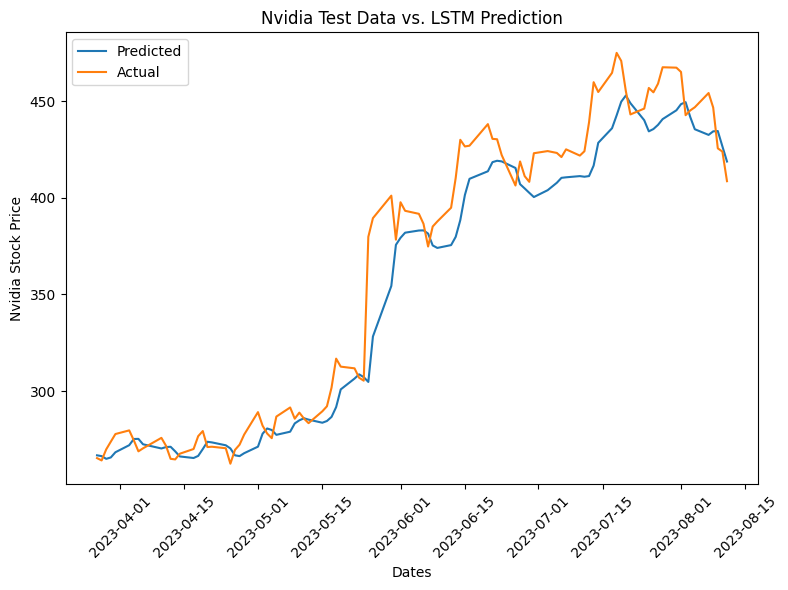

In [36]:
plt.figure(figsize=(8,6))
plt.plot(dates, predictions, label = 'Predicted')
plt.plot(dates, y_test_inversed, label = "Actual")
plt.title('Nvidia Test Data vs. LSTM Prediction')
plt.ylabel('Nvidia Stock Price')
plt.xlabel('Dates')
plt.legend()
plt.xticks(rotation =45, fontsize=10)
plt.tight_layout()

Let's look at some statistical tests of our results

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mse = mean_squared_error(y_test_inversed, predictions)
rmse = mean_squared_error(y_test_inversed, predictions, squared=False)
mae = mean_absolute_error(y_test_inversed, predictions)
r2 = r2_score(y_test_inversed, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 327.3943832997949
Root Mean Squared Error (RMSE): 18.094042757211415
Mean Absolute Error (MAE): 12.845636049906412
R-squared (R2) score: 0.9430763743260057


### Analyzing Model Results

Looking at the above metrics we see that our model can explain 96.5% of the variance of the stock prices as shown by the r2 value. The error metrics such as RMSE and MAE give us some context to how far off are predictions are from the actual stock price on average. The values 9.45 for MAE and 14.2 for RMSE tell us that on average our prediction is roughly between 2-3.5% off the actual price, which is a respectable result. One interesting point is that our prediction error seemed to increase after the large spike in price of May 2023, maybe it is better to use a smaller sample size? At the same time there are risk associated with only using data from the last 3 months.

Lets create a function to allow myself to easily test different hyperparameters for the model

In [39]:
def run_lstm(neurons1, nuerons2, batch_sizes, denses1, denses2 ,dropout_rate):
    model = Sequential()
    model.add(LSTM(neurons1, return_sequences=True, input_shape =(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(nuerons2, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(denses1))
    model.add(Dropout(dropout_rate))
    model.add(Dense(denses2))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=batch_sizes, epochs=100)

    return model

In [40]:
new_model1 = run_lstm(32,32,32,32,1,0.3)

Epoch 1/100
13/13 [==============================] - 3s 5ms/step - loss: 0.0426
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 13/100
13/13 [=================

In [41]:
predictions2 = new_model1.predict(X_test)
predictions2 = sc.inverse_transform(predictions2)

3/3 [==============================] - 1s 2ms/step


In [42]:
mse = mean_squared_error(y_test_inversed, predictions2)
rmse = mean_squared_error(y_test_inversed, predictions2, squared=False)
mae = mean_absolute_error(y_test_inversed, predictions2)
r2 = r2_score(y_test_inversed, predictions2)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 720.3512403144267
Root Mean Squared Error (RMSE): 26.839359908806074
Mean Absolute Error (MAE): 20.426513671875
R-squared (R2) score: 0.8747534886085456


This model performed a little bit worse, lets try again

In [43]:
new_model2 = run_lstm(128,64,64,25,1,0.2)

Epoch 1/100
7/7 [==============================] - 3s 9ms/step - loss: 0.0534
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0139
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0032
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 11/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 13/100
7/7 [==============================] - 0s 9ms

In [44]:
predictions3 = new_model2.predict(X_test)
predictions3 = sc.inverse_transform(predictions3)

3/3 [==============================] - 1s 2ms/step


In [45]:
mse = mean_squared_error(y_test_inversed, predictions3)
rmse = mean_squared_error(y_test_inversed, predictions3, squared=False)
mae = mean_absolute_error(y_test_inversed, predictions3)
r2 = r2_score(y_test_inversed, predictions3)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 241.1799430031483
Root Mean Squared Error (RMSE): 15.529969188737894
Mean Absolute Error (MAE): 10.387743631998694
R-squared (R2) score: 0.9580663643120139


Today (8/11) 'predictions3' is the most accurate but yesterday, this model was the least accurate.

I could also create a for loop to input different parameters into the model for testing but this would be very CPU intensive

Let's plot all three charts to compare.

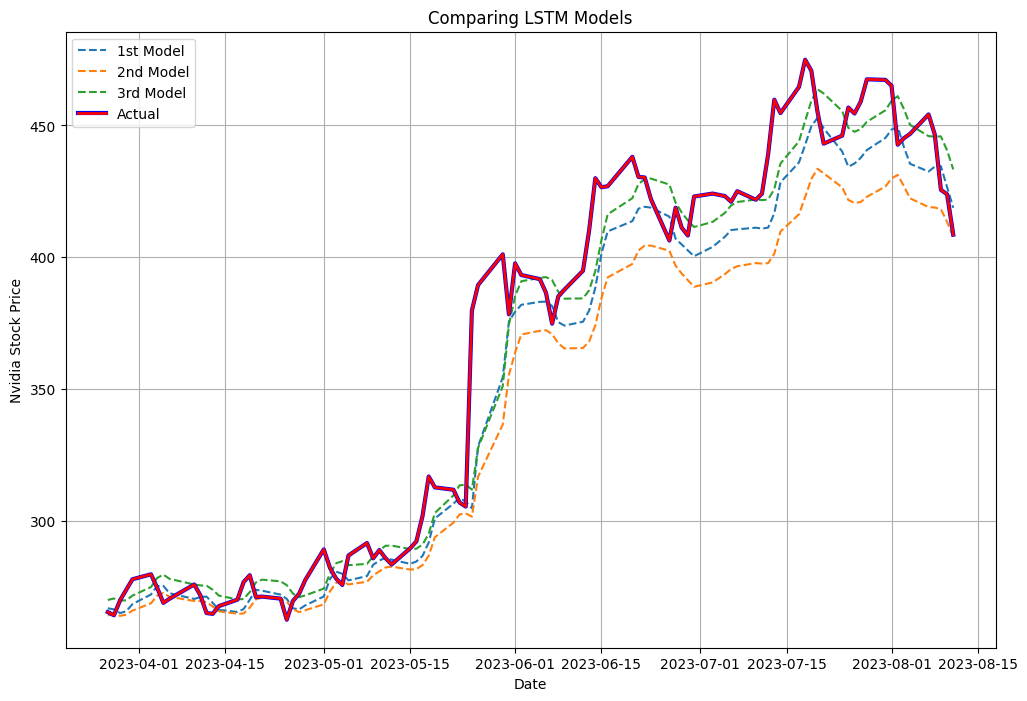

In [46]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(dates, predictions,'--', label = '1st Model')
plt.plot(dates, predictions2,'--', label = '2nd Model')
plt.plot(dates, predictions3, '--' , label = '3rd Model',)
plt.plot(dates, y_test_inversed, label = "Actual", linewidth =2, color = 'red', path_effects = [pe.Stroke(linewidth =3, foreground = 'b', ), pe.Normal()] )
plt.title('Comparing LSTM Models')
plt.ylabel('Nvidia Stock Price')
plt.xlabel('Date')
plt.legend()


Looking at our models, we have recieved a very high r2 score up to .94. (Note: these r2 values and residual measures do change daily along with the accuracy of each model) This brings in concerns of overfitting the model and a potential for the look-ahead bias to be affecting these results. Looking back at our training and testing splits, as well as our feature engineering by creating the lag term I currently don't see how data leakage could occur but this will need further examination. 

Moving forward, I would like to get experimenting with the hyperparameters in this LSTM model. Specifically, changing the lag term and increase/decrease the amount of hidden layers in the model.

Another area I would also like to explore is by training the data on daily return values instead of prices. I would also like to experiment with the scaling of the data, potentially using standardization or log values. Using other metrics such as volume would be an interesting experiment as well.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

To summarize, in this analysis I employed a LSTM time-series model to forecast Nvidia's stock price. The model performed up to a .94 r^2 score and RMSE of 18.48, suggesting great accuracy of prediciting Nvidia's stock. Despite this high accuracy this model still may not effective in predicting future prices due to stock price being built up of so many components such as market conditions, interest rates, economic outlook, and the list goes on and on. There are a lot of changes I would like to implement into future models, as previously mentioned, and concerns about overfitting and data leakage that could be looked at. Furthermore, this was simply an exploration into RNN / LSTM models, these models are extremely complex and I will continue to make projects in the future on these topics to gain a deeper understanding. I look forward to hearing feedback from the GitHub community on this code and my thought process behind much of it! Thank you all!